In [30]:
import cv2
import urllib
import numpy as np

# img_url = "https://www.aussietreesolutions.com.au/wp-content/uploads/2018/08/facts-about-trees-1037x675.jpg"
img_url = "https://kultura.azureedge.net/artworks/950ef594-04a7-483e-861a-40c40ebefd2c_1280_1024_80.webp"

k1 = np.array([[0, 0, 0], [0, 2, 0], [0, 0, 0]])
k2 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])  # this
k3 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
k4 = np.array([[0.0625, 0.125, 0.0625], [0.125, 0.25, 0.125], [0.0625, 0.125, 0.0625]])
k5 = np.array([[-1, 0, 1], [-3, 0, 3], [-1, 0, 1]])  # and this
k6 = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  # or this


resp = urllib.request.urlopen(img_url)
img = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(img, cv2.IMREAD_COLOR)

out1 = cv2.filter2D(img, -1, k1)
out2 = cv2.filter2D(img, -1, k2)
out3 = cv2.filter2D(img, -1, k3)
out4 = cv2.filter2D(img, -1, k4)
out5 = cv2.filter2D(img, -1, k5)
out6 = cv2.filter2D(img, -1, k6)


def resize_img(image, scale=45):
    width = int(image.shape[1] * scale / 100)
    height = int(image.shape[0] * scale / 100)
    return cv2.resize(image, (width, height))

def add_text(image, text):
    return cv2.putText(image, text, (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

kernels = [str(k1), str(k2), str(k3), str(k4), str(k5), str(k6)]
resized_images_with_text = [add_text(resize_img(x), k) for x, k in zip([img, out1, out2, out3, out4, out5, out6], ['Original'] + kernels)]

# output_hor1 = np.hstack((resized_images_with_text[0], np.zeros_like(resized_images_with_text[0]), np.zeros_like(resized_images_with_text[0])))
output_hor2 = np.hstack(resized_images_with_text[4:7])
output_hor3 = np.hstack(resized_images_with_text[1:4])
output_final = np.vstack((output_hor2, output_hor3))  # output_hor1,

# cv2.imshow('Original', img)

cv2.imshow('Output', output_final)
cv2.waitKey(0)
cv2.destroyAllWindows()

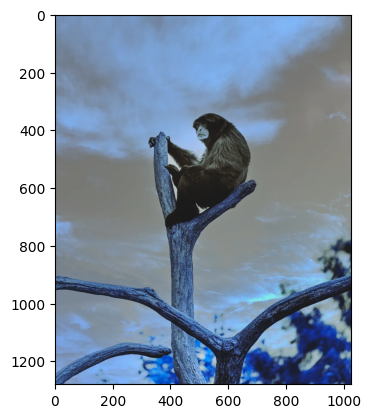

In [23]:
import matplotlib.pyplot as plt
plt.imshow(img)